## Манипулирование данными

Невозможно что-либо сделать, если мы не умеем манипулировать данными. Две основные операции, которые нам нужно сделать с данными — получить их и обработать. Нет смысла собирать данные, если мы даже не знаем, как их хранить, поэтому давайте сначала поработаем с синтетическими данными. Мы начнем с torch.tensor. Это основной инструмент для хранения и преобразования данных в torch. Если вы раньше работали с NumPy, вы заметите, что он по своей конструкции очень похож на многомерный массив NumPy. Тем не менее, он даёт несколько ключевых преимуществ. Во-первых, torch.tensor поддерживает асинхронные вычисления на CPU и GPU. Во-вторых, он обеспечивает поддержку автоматического дифференцирования.

Начнём с импорта torch

In [ ]:
import torch

Tensor — это массив (возможно, многомерный) числовых значений. Tensor с одной осью называется (в математике) вектором, с двумя — матрицей. Для массивов с более чем двумя осями нет специальных имен, их называют просто тензорами.
Самый простой объект, который мы можем создать, — это вектор. Для начала мы можем использовать arange для создания вектора строки с 12 последовательными целыми числами.

In [ ]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
xx = torch.Tensor([[x, x**2, x**3] for x in range(12)])
xx

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 1.0000e+00, 1.0000e+00],
        [2.0000e+00, 4.0000e+00, 8.0000e+00],
        [3.0000e+00, 9.0000e+00, 2.7000e+01],
        [4.0000e+00, 1.6000e+01, 6.4000e+01],
        [5.0000e+00, 2.5000e+01, 1.2500e+02],
        [6.0000e+00, 3.6000e+01, 2.1600e+02],
        [7.0000e+00, 4.9000e+01, 3.4300e+02],
        [8.0000e+00, 6.4000e+01, 5.1200e+02],
        [9.0000e+00, 8.1000e+01, 7.2900e+02],
        [1.0000e+01, 1.0000e+02, 1.0000e+03],
        [1.1000e+01, 1.2100e+02, 1.3310e+03]])

In [ ]:
torch.Tensor([1])

tensor([1.])

Мы можем получить форму экземпляра tensor через свойство shape.

In [ ]:
x.shape, xx.shape

(torch.Size([12]), torch.Size([12, 3]))

Узнать, расположен ли он на gpu или cpu, можно через специальный аттрибут device.

In [ ]:
x.device

device(type='cpu')

Мы используем функцию view, чтобы изменить форму одного (возможно, многомерного) массива на другой, который содержит такое же количество элементов. Например, мы можем преобразовать форму нашего векторного вектора x в (3, 4), который содержит те же значения, но интерпретирует их как матрицу, содержащую 3 строки и 4 столбца. Обратите внимание, что, хотя форма изменилась, элементы в x не изменились. Причём количество элементов осталось прежним.

In [ ]:
x.view((2,-1,2)).shape

torch.Size([2, 3, 2])

In [ ]:
x.reshape((2,-1,3)).shape

torch.Size([2, 2, 3])

Указывать каждое измерение вручную достаточно утомительно. К счастью, torch может автоматически выводить одно измерение, учитывая другие. Мы можем указать -1 для измерения, которое мы хотели бы, чтобы torch автоматически выводил. В нашем случае вместо x.view((3, 4)) мы могли бы использовать x.view ((- 1, 4)) или x.view((3, -1)).

In [ ]:
x.view((-1, 4))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Другие две полезные функции — zeros и ones. Они создают массивы из всех нулей и всех единиц. Они принимают форму создаваемого тензора в качестве параметра.

In [ ]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

Конечно же, можно создать тензор явно, указав все значения.

In [ ]:
torch.tensor([[1,2,3], [4,5,6], [10,11,0]])

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [10, 11,  0]])

Иногда бывает полезно создать массив, заполненный случайными значениями. Для этого используются функции torch.rand и torch.randn. Первое использует равномерное распределение, второе — нормальное

In [ ]:
torch.rand((2,3,4))

tensor([[[0.6395, 0.9673, 0.1783, 0.7475],
         [0.1175, 0.1170, 0.0439, 0.0460],
         [0.1690, 0.3159, 0.5858, 0.0013]],

        [[0.8692, 0.4489, 0.9983, 0.8434],
         [0.5657, 0.2207, 0.5812, 0.2472],
         [0.1624, 0.3124, 0.0330, 0.2344]]])

In [ ]:
torch.randn((2,3,4))

tensor([[[ 0.4045,  0.9398, -1.6803,  1.0544],
         [ 2.9761, -0.0808, -1.3215,  0.6697],
         [-0.0563,  2.8078,  0.0152,  1.6564]],

        [[ 2.7859, -1.1182, -0.3278,  2.3890],
         [-1.2613, -1.4962,  1.6390, -1.6176],
         [ 0.6995,  2.4876,  0.3505, -0.6091]]])

## Операции

Обычно мы хотим не только создавать массивы, но и применять к ним функции. Самые простые и полезные из них — это поэлементные функции. Они работают, выполняя одну скалярную операцию над соответствующими элементами двух массивов. 

In [ ]:
x = torch.tensor([1., 2., 4., 8.])
y = torch.ones_like(x) * 2
print('x =', x)
print('y =', y)
print('x + y', x + y)
print('x - y', x - y)
print('x * y', x * y)
print('x / y', x / y)

x = tensor([1., 2., 4., 8.])
y = tensor([2., 2., 2., 2.])
x + y tensor([ 3.,  4.,  6., 10.])
x - y tensor([-1.,  0.,  2.,  6.])
x * y tensor([ 2.,  4.,  8., 16.])
x / y tensor([0.5000, 1.0000, 2.0000, 4.0000])


Ещё больше операций может быть выполненно поэлементно. Например, операции exp.

In [ ]:
x.exp()

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

В дополнение к поэлементным вычислениям, мы также можем выполнять матричные операции. Например, матричное умножение. Для этого используется функция mm.

In [ ]:
x1 = torch.arange(12)
x2 = torch.arange(12)
x3 = torch.arange(12)

In [ ]:
x = torch.arange(12).reshape((3,4))
y = torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.mm(x, y.T)

tensor([[ 18,  20,  10],
        [ 58,  60,  50],
        [ 98, 100,  90]])

Мы также можем объединить несколько тензоров. Для этого нам нужно указать, по какому измерению производить объединение. В приведённом ниже примере объединяются две матрицы по измерению 0 (по строкам) и измерению 1 (по столбцам) соответственно.

In [ ]:
torch.cat((x, y), axis=0)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [ 2,  1,  4,  3],
        [ 1,  2,  3,  4],
        [ 4,  3,  2,  1]])

In [ ]:
torch.cat((x, y), dim=1)

tensor([[ 0,  1,  2,  3,  2,  1,  4,  3],
        [ 4,  5,  6,  7,  1,  2,  3,  4],
        [ 8,  9, 10, 11,  4,  3,  2,  1]])

Для получения булевых тензоров можно использовать булевы операторы. Например, можно сравнить два тензора при помощи оператора ==

In [ ]:
(x <= y).int()

tensor([[1, 1, 1, 1],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)

In [ ]:
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Суммирование всех элементов тензора даёт тензор с одним элементом.

In [ ]:
x.sum()

tensor(66)

Мы можем преобразовать результат в скаляр в Python, используя функцию item

In [ ]:
x.sum().item()

66

In [ ]:
x.sum(dim=1).shape

torch.Size([3])

In [ ]:
x.sum(dim=1, keepdim=True).shape

torch.Size([3, 1])

In [ ]:
x.sum(dim=0, keepdim=True).shape

torch.Size([1, 4])

Преобразование типов

In [ ]:
x.dtype

torch.int64

In [ ]:
x.double()

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=torch.float64)

In [ ]:
x.type('torch.DoubleTensor')

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=torch.float64)

In [ ]:
x = torch.tensor([4,5,6,7])
y = 3
x - y

tensor([1, 2, 3, 4])

##Изменение размерности

In [ ]:
x.shape

torch.Size([3, 4])

In [ ]:
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [ ]:
x.unsqueeze(1).shape

torch.Size([3, 1, 4])

In [ ]:
x.unsqueeze(2)

tensor([[[ 0],
         [ 1],
         [ 2],
         [ 3]],

        [[ 4],
         [ 5],
         [ 6],
         [ 7]],

        [[ 8],
         [ 9],
         [10],
         [11]]])

In [ ]:
x.unsqueeze(1).shape

torch.Size([3, 1, 4])

In [ ]:
x.unsqueeze(1)

tensor([[[ 0,  1,  2,  3]],

        [[ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11]]])

In [ ]:
x.unsqueeze(2).shape

torch.Size([3, 4, 1])

In [ ]:
x.unsqueeze(2)

tensor([[[ 0],
         [ 1],
         [ 2],
         [ 3]],

        [[ 4],
         [ 5],
         [ 6],
         [ 7]],

        [[ 8],
         [ 9],
         [10],
         [11]]])

In [ ]:
x.unsqueeze(2).unsqueeze(1).squeeze().shape

torch.Size([3, 4])

In [ ]:
x.T

tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]])

In [ ]:
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [ ]:
x.unsqueeze(0).squeeze().shape

torch.Size([3, 4])

##Транспонирование

In [ ]:
x.T

tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]])

In [ ]:
x.permute(1,0)

tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]])

In [ ]:
xx = torch.rand((2,3,4))

In [ ]:
xx

tensor([[[0.6235, 0.7021, 0.5379, 0.8869],
         [0.9846, 0.3704, 0.8588, 0.4023],
         [0.1905, 0.6650, 0.2869, 0.5720]],

        [[0.2367, 0.2103, 0.5284, 0.1468],
         [0.3513, 0.0533, 0.7710, 0.1737],
         [0.3670, 0.2350, 0.5171, 0.0335]]])

In [ ]:
xx.permute(1,2,0)

tensor([[[0.6235, 0.2367],
         [0.7021, 0.2103],
         [0.5379, 0.5284],
         [0.8869, 0.1468]],

        [[0.9846, 0.3513],
         [0.3704, 0.0533],
         [0.8588, 0.7710],
         [0.4023, 0.1737]],

        [[0.1905, 0.3670],
         [0.6650, 0.2350],
         [0.2869, 0.5171],
         [0.5720, 0.0335]]])

## Broadcast 

Выполнять операции можно не только с тензорами одинакового размера, но и разного. Когда их формы различаются, запускается механизм broadcast'а. Сначала элементы копируются соответствующим образом, чтобы два тензора имели одинаковую форму, а затем операции выполняются поэлементно.

In [ ]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(4).reshape((1, 4))
a, b

(tensor([[0],
         [1],
         [2]]), tensor([[0, 1, 2, 3]]))

Поскольку a и b являются матрицами (3x1) и (1x2) соответственно, их формы не совпадают. Torch решает эту проблему путём broadcast'а значений обеих матриц в большую (3x2) матрицу следующим образом: для матрицы a он реплицирует столбцы, для матрицы b он реплицирует строки. После чего запускается операция сложения

In [ ]:
a + b

tensor([[0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5]])

## Индексирование

Как и в любом другом массиве Python, элементы в тензоре могут быть доступны по их индексу. По традиции первый элемент имеет индекс 0, а диапазоны указываются для включения первого, но не последнего элемента. По этой логике `1: 3` выбирает второй и третий элемент из тензора

In [ ]:
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [ ]:
x[1:3,1:3]

tensor([[ 5,  6],
        [ 9, 10]])

Мы так же можем изменять значения в тензоре

In [ ]:
x[1:3, 2:3] = 9
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  9,  7],
        [ 8,  9,  9, 11]])

Если мы хотим присвоить нескольким элементам одно и то же значение, мы просто индексируем все из них (при помощи оператора `:`), а затем присваиваем им значения. Например, `[0:2,:]` обращается к первой и второй строчкам.

In [ ]:
x[0:2, :] = 12
x

tensor([[12, 12, 12, 12],
        [12, 12, 12, 12],
        [ 8,  9,  9, 11]])

## В numpy и назад

In [ ]:
x.numpy()

array([[12, 12, 12, 12],
       [12, 12, 12, 12],
       [ 8,  9, 10, 11]])

In [ ]:
y = torch.tensor(x.numpy())
y

tensor([[12, 12, 12, 12],
        [12, 12, 12, 12],
        [ 8,  9, 10, 11]])

## Немного практики

1. Матрица B называется обратной к матрице A, если A*B = I (где I - единичная матрица). Найдите (перебором) обратную к матрице A = ((1,1), (1,2))
2. Примените оператор преобразования A = ((1,2), (3,4)) к квадрату с вершинами в точках (1,1), (1,-1), (-1, -1), (-1, 1) и найдите расстояния между получившимися вершинами

In [ ]:
a = torch.tensor([[1,1],[1,2]])
b = torch.tensor([[2,-1],[-1,1]])
torch.mm(a,b)


tensor([[1, 0],
        [0, 1]])

In [ ]:
a = torch.tensor([[1,2],[3,4]])

l = [[1,1],[1,-1],[-1,-1],[-1,1]]

In [ ]:
for i in l:
  t = torch.tensor(i)
  print(torch.mv(a,t))


tensor([3, 7])
tensor([-1, -1])
tensor([-3, -7])
tensor([1, 1])


## Вероятности

In [ ]:
# Равномерное распределение вероятности

In [ ]:
torch.rand(10)

tensor([0.6790, 0.1662, 0.2623, 0.9339, 0.4865, 0.5421, 0.4671, 0.3601, 0.5452,
        0.9982])

In [ ]:
## Нормальное распределение

In [ ]:
torch.randn(10)

tensor([ 1.4297,  0.5075,  0.1440,  0.5910,  0.7830,  2.2571, -2.4278, -0.1643,
        -1.2213,  1.7620])

In [ ]:
## Равномерное на целых числах

In [ ]:
torch.randint(0, 10, (10,))

tensor([4, 6, 5, 5, 7, 6, 0, 6, 3, 0])

## Постройте график плотности для нормального распределения

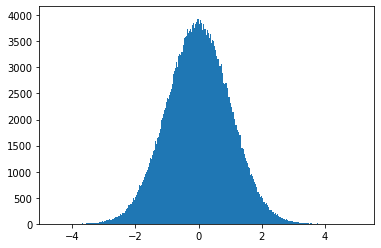

In [ ]:
from matplotlib import pyplot as plt
_ = plt.hist(torch.randn(1000000), bins=1000)